In [38]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime 
from datetime import timedelta

In [39]:
import os
#get working directory in python
os.getcwd()
#change working directory in python
os.chdir("/home/belu/Escritorio/Proyecto_TESIS/reanalysis/BS_otonio")

import funciones as fun

In [84]:
anios = np.array(["1980_03","1984_04","1990_03","1991_04","1996_05","2000_04","2001_03",
                  "2003_03","2007_03","2008_04","2010_05"])

my_data="ERA_interim_reanalisis_" + anios[0] + "_gep_wind_temp_area1.nc"
fh = Dataset(my_data, mode='r')

In [85]:
lat = fh.variables['latitude'][:]
lon = fh.variables['longitude'][:]

time = fh.variables['time'][:]
hgt = fh.variables['z'][:] # 2 meter temperature
v= fh.variables["v"][:]
u= fh.variables["u"][:]

v_units = fh.variables['v'].units
hgt_units= fh.variables["z"].units

import numpy.ma as ma

In [86]:
x = np.array([(1, 1.), (2, 2.)], dtype=[('a',int), ('b', float)])

x.view(ma.MaskedArray)

type(hgt[118,0][1,2])

numpy.float64

In [75]:
hgt[~hgt.mask]
#hgt.compressed()
#aux1=hgt[118,0]
#aux2=ma.MaskedArray.round(aux1,decimals=0)


masked_array(data=[95008.63210043032, 95005.9072976592, 95002.27422729769,
                   ..., 92823.94578971663, 92825.00543523874,
                   92823.34027798972],
             mask=[False, False, False, ..., False, False, False],
       fill_value=-32767)

In [ ]:
from decimal import Decimal

# outputs 25.0,  PROBLEM!  I would like it to output 25
print(Decimal('2.5') * 10)

# outputs 2567.8000, PROBLEM!  I would like it to output 2567.8
print(Decimal('2.5678') * 1000)


def normalize_fraction(d):
    normalized = d.normalize()
    sign, digit, exponent = normalized.as_tuple()
    return normalized if exponent <= 0 else normalized.quantize(1)
aux2=normalize_fraction(Decimal(hgt[118,0]))


In [87]:
m = Basemap(projection='cyl', llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')

lon, lat = np.meshgrid(lon, lat)
xi, yi = m(lon, lat)

In [88]:
# PASO 1: Crear una lista de "RGB tuples" (Ver https://es.wikipedia.org/wiki/Colores_web#Tabla_de_colores)
colors = [(255,255,255),(255,255,255),(255, 255, 150),(255, 100 , 50),(255, 10, 10)
          ,( 150, 0, 0),(50, 0 ,0)]

# PASO 2: Crear un "array o "list" de posiciones de 0 a 1 (abarcando el rango de la variable a graficar)
position = [0, 0.166,0.333, 0.4999, 0.6666,0.83333,1]

# PASO 3: Llamar a la funcion "make_cmap" que devuelve el nuevo colormap para luego utilizar en la grafica
cmap_new_r = fun.make_cmap(colors,70, position=position, bit=True)

/home/belu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


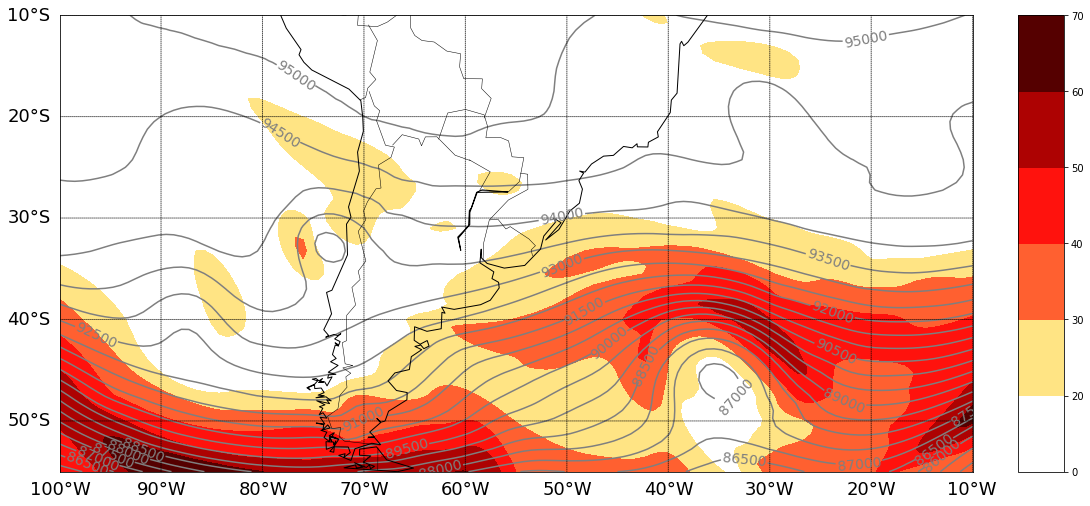

In [100]:
fig = plt.figure(figsize=(18,12))

#############################################################################################################
# hgt(tiempo, nivel)
# m.contour(x,y,z,{cada/20 mgp})
#plt.clabel(cs,,,fmt="%1.0f") fmt se usa para darle formato a las etiquetas,  "%1.0f" =sin decimales
#"%1.3" para 3 decimales y ese es x default

cs = m.contour(xi,yi,np.squeeze(hgt[118,0]),20,colors="#7f7f7f")
plt.clabel(cs, inline=1, fontsize=14,fmt ="%1.0f")

speed=np.sqrt(u*u+v*v)

#cs1=m.contour(xi,yi,speed[117,0],latlon=True)
#plt.clabel(cs1, inline=1, fontsize=14)

cs2=m.contourf(xi,yi,speed[118,0],levels=[0,20,30,40,50,60,70],cmap=cmap_new_r,latlon=True)


# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=18)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=18)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs2 ,location='right', pad="5%")
#plt.figtext(.5,.8,'Geopotencial (gpm) e Isotacas (m/s) a 300 hpa', fontsize=25, ha='center')
plt.show()
#cbar.set_label(v_units)